# 23/CS/301 Piyush Yadav
## Lab 06 – Classification Models &amp; Ensemble Evaluation

### Step 1: Import Libraries

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, roc_curve, classification_report
import joblib   # for saving model


### Step 2: Load & Preprocess Dataset

In [5]:
# Example: Load churn dataset
df = pd.read_csv("churn.csv")

# Encode categorical columns
for col in df.select_dtypes(include=['object']).columns:
    df[col] = LabelEncoder().fit_transform(df[col])

# Features & target
X = df.drop("Churn", axis=1)
y = df["Churn"]

# Scaling numeric features
scaler = StandardScaler()
X = scaler.fit_transform(X)

### Step 3: Train/Test Split

In [6]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

### Step 4: Fit Decision Tree

In [7]:
dt = DecisionTreeClassifier(max_depth=5, random_state=42)
dt.fit(X_train, y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,5
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


### Step 5: Evaluate Model

Accuracy: 0.7806955287437899
ROC AUC: 0.8185473662455759

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.85      0.85      1035
           1       0.58      0.60      0.59       374

    accuracy                           0.78      1409
   macro avg       0.72      0.72      0.72      1409
weighted avg       0.78      0.78      0.78      1409



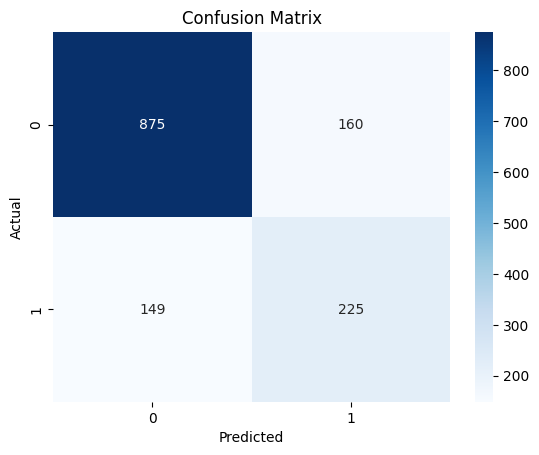

In [8]:
# Predictions
y_pred = dt.predict(X_test)
y_prob = dt.predict_proba(X_test)[:,1]

# Metrics
acc = accuracy_score(y_test, y_pred)
roc = roc_auc_score(y_test, y_prob)
cm = confusion_matrix(y_test, y_pred)

print("Accuracy:", acc)
print("ROC AUC:", roc)
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted"); plt.ylabel("Actual"); plt.title("Confusion Matrix")
plt.show()

### Step 6: Plot ROC Curve

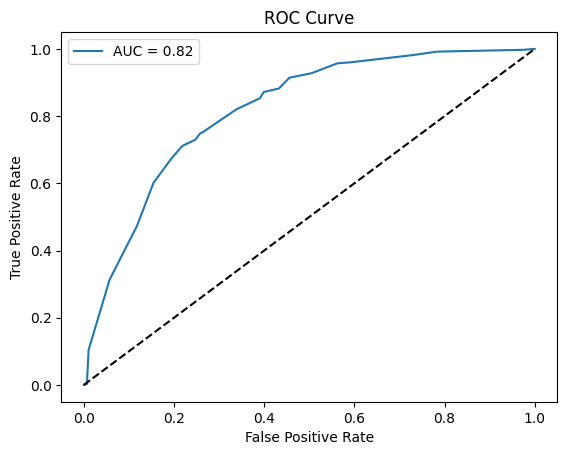

In [9]:
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
plt.plot(fpr, tpr, label=f"AUC = {roc:.2f}")
plt.plot([0,1],[0,1],'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

### Step 7: Save Best Model

In [10]:
joblib.dump(dt, "best_model.pkl")

['best_model.pkl']